In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *
from fastai.metrics import *
import glob
from shutil import copyfile, copy, move

In [89]:
path = Path('histopath')
train = path/'train'
test = path/'test'

In [90]:
files = list(path.rglob('*.*'))
len(files)

277524

In [91]:
np.random.seed(42)
np.random.shuffle(files)

In [92]:
n_test = 0.2

In [93]:
n_files = len(files)
n_test = round(n_test * n_files)

print(n_files, n_test)

277524 55505


In [94]:
test_list = files[:55505]
len(test_list)

55505

In [95]:
train_list = files[55505:]
len(train_list)

222019

In [100]:
for i in range(len(test_list)):
    current_path = test_list[i]
    filename = str(i) + '.png'
    os.rename(current_path, test/filename)

In [101]:
for i in range(len(train_list)):
    current_path = train_list[i]
    filename = current_path.stem + '.png'
    label = str(current_path).split("_")[4].split(".")[0]
    if (label == "class0"):
        os.rename(current_path, train/'0'/filename)
    else:
        os.rename(current_path, train/'1'/filename)

In [122]:
tfms = get_transforms(flip_vert=True,
                      max_rotate=4.,
                      max_zoom=1.2,
                      max_warp=0.)

In [126]:
data = ImageDataBunch.from_folder(path, train, valid_pct = 0.2, ds_tfms = tfms, bs=64, size=49)

In [127]:
data.c, data.classes

(2, ['0', '1'])

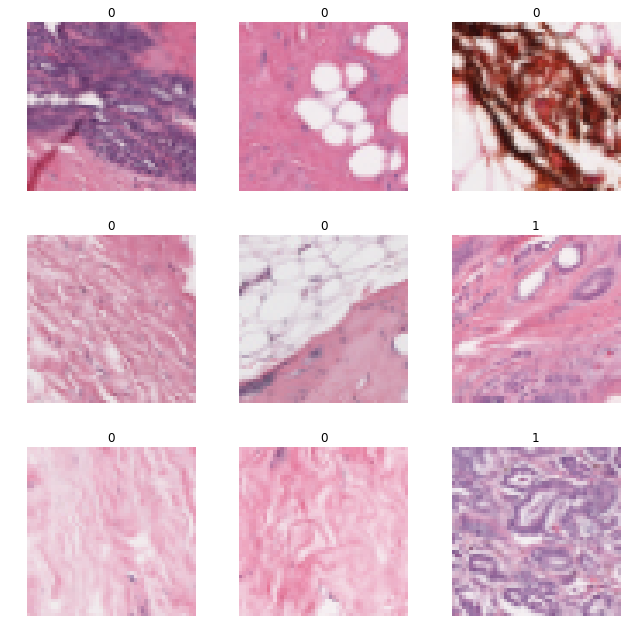

In [128]:
data.show_batch(3, figsize=(9, 9))

In [129]:
learn = create_cnn(data, models.resnet34, metrics = accuracy)

In [130]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.347413,0.320932,0.862014


In [132]:
learn.save('stage-1', path)

PosixPath('histopath/models/stage-1.pth')

In [133]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.284893,0.272845,0.884850


In [134]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


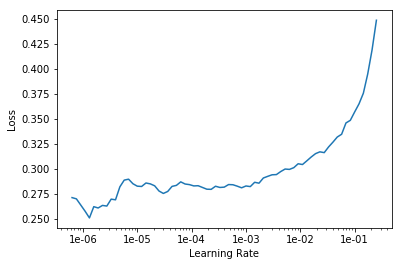

In [135]:
learn.recorder.plot()

In [ ]:
learn.load('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


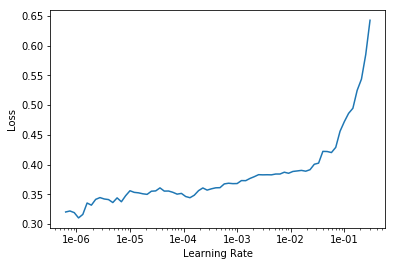

In [139]:
learn.lr_find()
learn.recorder.plot()

In [140]:
learn.fit_one_cycle(1, 1e-6)

epoch,train_loss,valid_loss,accuracy
1,0.331951,0.317371,0.864806


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


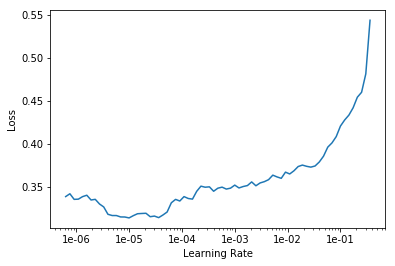

In [141]:
learn.lr_find()
learn.recorder.plot()

In [142]:
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy
1,0.320595,0.308287,0.868342


In [144]:
learn.save('stage-2', path)

PosixPath('histopath/models/stage-2.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


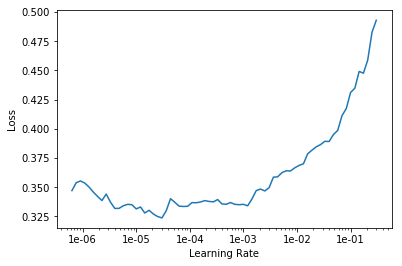

In [145]:
learn.lr_find()
learn.recorder.plot()

In [146]:
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy
1,0.315608,0.304433,0.870279


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


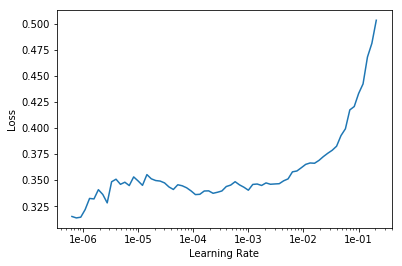

In [147]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.load('stage-2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


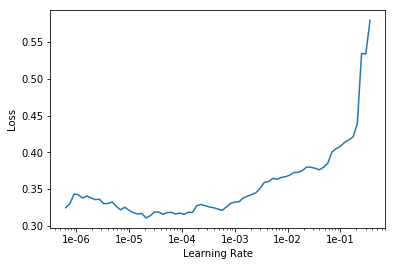

In [150]:
learn.lr_find()
learn.recorder.plot()

In [151]:
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy
1,0.323450,0.303975,0.870459


In [152]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy
1,0.326745,0.298496,0.872486


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


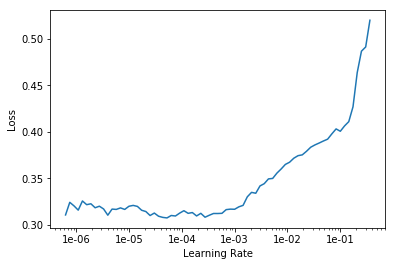

In [153]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


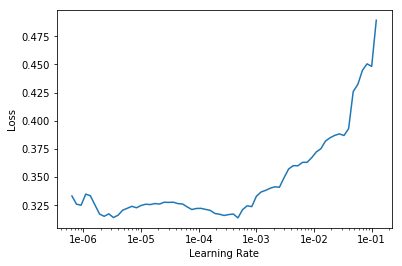

In [154]:
learn.save('stage-3')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [155]:
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.302222,0.291707,0.875842


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


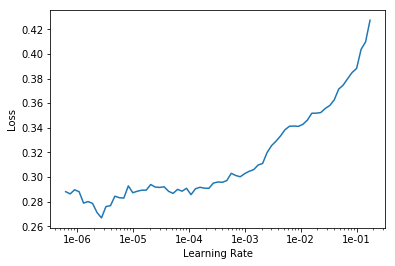

In [156]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.load('stage-1')

In [158]:
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy
1,0.316562,0.343834,0.855235
2,0.286588,0.257075,0.893115


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


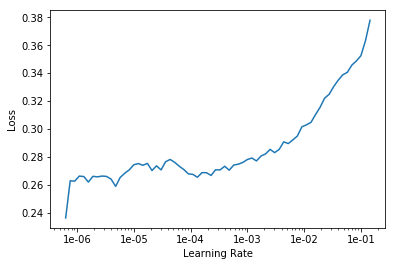

In [160]:
learn.lr_find()
learn.recorder.plot()

In [161]:
learn.save('stage-4', path)

PosixPath('histopath/models/stage-4.pth')

In [162]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.271707,0.252899,0.893746


In [163]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.272856,0.250169,0.894849


In [166]:
learn.save('iter-1', path)

PosixPath('histopath/models/iter-1.pth')

In [164]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


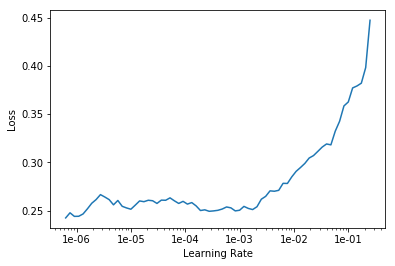

In [165]:
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


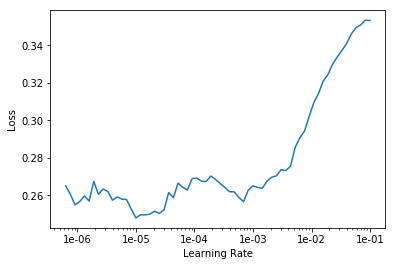

In [167]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [168]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.268940,0.249711,0.895322


In [172]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.256607,0.246510,0.896854


In [173]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy
1,0.266200,0.243307,0.898002


In [174]:
learn.save('iter-2', path)

PosixPath('histopath/models/iter-2.pth')

In [175]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy
1,0.286164,0.259290,0.892169
2,0.257631,0.239150,0.900322


In [176]:
learn.save('iter-2', path)

PosixPath('histopath/models/iter-2.pth')

In [177]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.247082,0.237697,0.900930


In [178]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy
1,0.259095,0.460062,0.789609
2,0.234448,0.431788,0.898701


In [179]:
learn.load('iter-2')
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.255233,0.237059,0.901854


In [180]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.264100,0.238114,0.900727


In [181]:
learn.save('iter-3', path)

PosixPath('histopath/models/iter-3.pth')